
<a href="https://colab.research.google.com/github/kokchun/Databehandling-AI22/blob/main/Lectures/L1-missing-aggregation.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; for interacting with the code

---
# Lecture notes - Pandas - missing data & aggregations

---
This is the lecture note for **Pandas missing data & aggregations** - but it's built upon contents from previous course: 
- Python programming

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to Pandas. I encourage you to read further about pandas.

Read more 

- [documentation - read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

- [documentation - aggregate](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.aggregate.html)

- [documentation - groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

- [documentation - missing values](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)
---

## Setup
- create dummy DataFrame
- it's very useful to create dummy DataFrame in order to test and learn Pandas methods

In [7]:
import numpy as np 
import pandas as pd
np.random.seed(42)

n = 8
random_matrix = np.random.randint(1,10, (n,n))
index = np.random.choice(random_matrix.size, 10, replace = False)
print(f"index {index}")
print(f"Flattens the matrix: {random_matrix.ravel()}")

random_matrix = random_matrix*1.0 # to convert it to float as np.nan is float
random_matrix.ravel()[index] = None # returns contiguous flattened array
# numeric containers always use NaN 
print(random_matrix)

index [21 20 36  3  5 29 12 37 41 33]
Flattens the matrix: [7 4 8 5 7 3 7 8 5 4 8 8 3 6 5 2 8 6 2 5 1 6 9 1 3 7 4 9 3 5 3 7 5 9 7 2 4
 9 2 9 5 2 4 7 8 3 1 4 2 8 4 2 6 6 4 6 2 2 4 8 7 9 8 5]
[[ 7.  4.  8. nan  7. nan  7.  8.]
 [ 5.  4.  8.  8. nan  6.  5.  2.]
 [ 8.  6.  2.  5. nan nan  9.  1.]
 [ 3.  7.  4.  9.  3. nan  3.  7.]
 [ 5. nan  7.  2. nan nan  2.  9.]
 [ 5. nan  4.  7.  8.  3.  1.  4.]
 [ 2.  8.  4.  2.  6.  6.  4.  6.]
 [ 2.  2.  4.  8.  7.  9.  8.  5.]]


In [8]:
scores = pd.DataFrame(random_matrix, index=[
                      f"Player {i}" for i in range(1, n+1)], columns=[f"Round {i}" for i in range(1,n+1)])
scores

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,7.0,4.0,8.0,NaN,7.0,NaN,7.0,8.0
Player 2,5.0,4.0,8.0,8.0,NaN,6.0,5.0,2.0
Player 3,8.0,6.0,2.0,5.0,NaN,NaN,9.0,1.0
Player 4,3.0,7.0,4.0,9.0,3.0,NaN,3.0,7.0
Player 5,5.0,NaN,7.0,2.0,NaN,NaN,2.0,9.0
Player 6,5.0,NaN,4.0,7.0,8.0,3.0,1.0,4.0
Player 7,2.0,8.0,4.0,2.0,6.0,6.0,4.0,6.0
Player 8,2.0,2.0,4.0,8.0,7.0,9.0,8.0,5.0


---
## Missing data techniques
- None - Pythonic missing data. A Python object - operations done on Python level and not numpy or pandas.
    - Error when performing arithmetic on None dtypes
- NaN - floating point "Not a Number". Supports fast operations, however all arithmetic operations with NaN results in a NaN
- NA - pd.NA -> missing indicator that can be used consistently across data types

Pandas treats NaN and None almost interchangeably
- isnull() - returns true if value is null  
- notnull() - returns true if value is not null
- dropna() - drops the the whole axis with nulls 
- fillna() - fills the null values with certain value

In [116]:
scores.isnull() 

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,False,False,False,True,False,True,False,False
Player 2,False,False,False,False,True,False,False,False
Player 3,False,False,False,False,True,True,False,False
Player 4,False,False,False,False,False,True,False,False
Player 5,False,True,False,False,True,True,False,False
Player 6,False,True,False,False,False,False,False,False
Player 7,False,False,False,False,False,False,False,False
Player 8,False,False,False,False,False,False,False,False


In [118]:
scores.dropna() # removes all rows that contains any NaNs

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 7,2.0,8.0,4.0,2.0,6.0,6.0,4.0,6.0
Player 8,2.0,2.0,4.0,8.0,7.0,9.0,8.0,5.0


In [120]:
scores.dropna(axis="columns") # removes all columns that contains any NaNs

,Round 1,Round 3,Round 7,Round 8
Player 1,7.0,8.0,7.0,8.0
Player 2,5.0,8.0,5.0,2.0
Player 3,8.0,2.0,9.0,1.0
Player 4,3.0,4.0,3.0,7.0
Player 5,5.0,7.0,2.0,9.0
Player 6,5.0,4.0,1.0,4.0
Player 7,2.0,4.0,4.0,6.0
Player 8,2.0,4.0,8.0,5.0


In [123]:
scores.fillna(0) # fills all nulls with zero 

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,7.0,4.0,8.0,0.0,7.0,0.0,7.0,8.0
Player 2,5.0,4.0,8.0,8.0,0.0,6.0,5.0,2.0
Player 3,8.0,6.0,2.0,5.0,0.0,0.0,9.0,1.0
Player 4,3.0,7.0,4.0,9.0,3.0,0.0,3.0,7.0
Player 5,5.0,0.0,7.0,2.0,0.0,0.0,2.0,9.0
Player 6,5.0,0.0,4.0,7.0,8.0,3.0,1.0,4.0
Player 7,2.0,8.0,4.0,2.0,6.0,6.0,4.0,6.0
Player 8,2.0,2.0,4.0,8.0,7.0,9.0,8.0,5.0


---
## Missing data - strategy
Note that there are several strategies to deal with missing data and we will come back to this in the future. 
The strategy you should choose may depend on:
- dataset size
    - small dataset - must be more careful with the data
    - large dataset and small amounts of nulls - can probably remove the rows
- can use different ways to impute missing data
- valuable information (depends on the usage of the data)
- percentage of missing values 
- domain knowledge - how to fill the nulls 
    - e.g. the score example above might be plausible to assume 0 score if the value is missing for certain round
    - e.g. missing some value in a category might be filled with mean or median of that category
    - e.g. missing value between two points could be interpolated
- note that missing values can negatively impact:
    - data visualization
    - arithmetic computations
    - machine learning algorithms 

In [62]:
import seaborn as sns 
# Seaborn has some toy datasets for learning: https://github.com/mwaskom/seaborn-data
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [78]:
nulls = titanic.isnull().sum()
print(nulls)

survived         0
pclass           0
sex              0
age             53
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


<AxesSubplot:xlabel='age', ylabel='Count'>

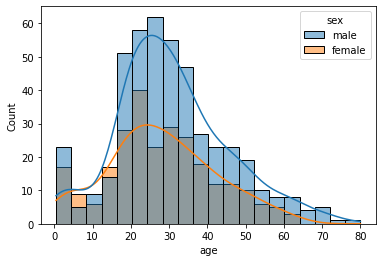

In [64]:
# Histogram of the age distribution for male and female 
sns.histplot(data= titanic, x="age", kde=True, hue="sex")

In [77]:
# Imagine that we have talked to a historian and this person advices us to use median age of the corresponding gender to fill in the missing ages 

median_male_age = titanic[titanic["sex"] == "male"]["age"].median()
median_female_age = titanic[titanic["sex"] == "female"]["age"].median()

print(f"Median male age: {median_male_age}")
print(f"Median female age: {median_female_age}")


titanic.loc[titanic["sex"] == "male", "age"] = titanic.loc[titanic["sex"] == "male", "age"].fillna(median_male_age)
titanic.loc[titanic["age"]==29, "sex"].value_counts() # to see that we get desired results

Median male age: 29.0
Median female age: 27.0


male      137
female      7
Name: sex, dtype: int64

In [86]:
print(titanic.isnull().sum().loc["age"]) # now we have 53 nulls left for age 
titanic.loc[titanic["age"].isnull(), "sex"].value_counts() # all these are female 

53


female    53
Name: sex, dtype: int64

In [88]:
titanic["age"] = titanic["age"].fillna(median_female_age)
titanic.isnull().sum().sex

0

<AxesSubplot:xlabel='age', ylabel='Count'>

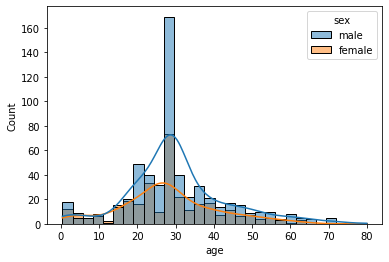

In [91]:
# now we see a huge peak at around 30 years, which may not reflect the reality very well 
# Can you figure out other ways of filling in the missing data 
sns.histplot(data=titanic, x="age", kde=True, hue="sex")

---
## Aggregations and groupby
Summarizing data

aggegations: 
```python
sum(), mean(), median(), min(), max()
```

Don't confuse with the **aggregate()** or **agg()** for short, method which uses one or more operations over specified axis

In [135]:
survivors = titanic.groupby("sex").mean()[["survived", "age"]]
for i in survivors.index:
    survived_percentage = survivors.loc[i, 'survived']*100
    print(f"Percentage survived {i}: {survived_percentage:.1f}%")
    print(f"Mean age of survived {i}: {survivors.loc[i, 'age']:.1f} years")

Percentage survived female: 74.2%
Mean age of survived female: 27.8 years
Percentage survived male: 18.9%
Mean age of survived male: 30.4 years


In [156]:
# important to select columns that are valid for max() - will raise TypeError in the future otherwise
titanic.groupby("class")[["age", "fare"]].max() 

,age,fare
class,,
First,80.0,512.3292
Second,70.0,73.5000
Third,74.0,69.5500


In [165]:
# aggregation with different aggregation methods 
titanic.agg(["count","mean","median","min","max"])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,889.0,891.0,891,891,203.0,889.0,891,891
mean,0.383838,2.308642,NaN,29.441268,0.523008,0.381594,32.204208,NaN,NaN,NaN,0.602694,NaN,NaN,NaN,0.602694
median,0.000000,3.000000,NaN,29.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
min,0.000000,1.000000,female,0.420000,0.000000,0.000000,0.000000,NaN,NaN,child,False,NaN,NaN,no,False
max,1.000000,3.000000,male,80.000000,8.000000,6.000000,512.329200,NaN,NaN,woman,True,NaN,NaN,yes,True


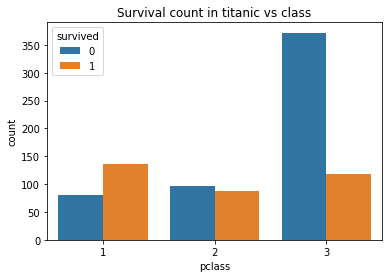

In [203]:
# survived and class 
survived_class = titanic.groupby(["survived", "pclass"]).count() # many from 3rd class died, counts non-null values
survived_class = survived_class.reset_index()
ax = sns.barplot(data = survived_class, x="pclass", y ="sex", hue="survived")
ax.set(ylabel="count", title="Survival count in titanic vs class");


---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---